# Importing libraries

In [1]:
import pandas as pd 
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt


# Exploratory Data Analysis(EDA)

In [2]:
#reading all data 
user_data = pd.read_csv('USER_TAKEHOME.csv')
trans_data = pd.read_csv('TRANSACTION_TAKEHOME.csv')
prod_data = pd.read_csv('PRODUCTS_TAKEHOME.csv')

## 1. Users Dataset

In [3]:
#Exploring the first few rows
user_data.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female


In [4]:
# Dataset overview 
user_data.info(), user_data.shape 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            100000 non-null  object
 1   CREATED_DATE  100000 non-null  object
 2   BIRTH_DATE    96325 non-null   object
 3   STATE         95188 non-null   object
 4   LANGUAGE      69492 non-null   object
 5   GENDER        94108 non-null   object
dtypes: object(6)
memory usage: 4.6+ MB


(None, (100000, 6))

In [5]:
#checking missing values
user_data.isnull().sum()

ID                  0
CREATED_DATE        0
BIRTH_DATE       3675
STATE            4812
LANGUAGE        30508
GENDER           5892
dtype: int64

In [6]:
#checking duplicates
user_data.duplicated().sum() 

0

In [7]:
#understanding possible value for categorical data columns 
for feature in user_data.columns:
    if user_data[feature].dtype==object:
        print(feature,  user_data[feature].unique())

ID ['5ef3b4f17053ab141787697d' '5ff220d383fcfc12622b96bc'
 '6477950aa55bb77a0e27ee10' ... '637d5efdd6f2a49c49934dcb'
 '5f0de23b05d8a6147dc0cafa' '5e7ab436905e9512ff44abc8']
CREATED_DATE ['2020-06-24 20:17:54.000 Z' '2021-01-03 19:53:55.000 Z'
 '2023-05-31 18:42:18.000 Z' ... '2022-11-22 23:45:05.000 Z'
 '2020-07-14 16:50:04.000 Z' '2020-03-25 01:30:30.000 Z']
BIRTH_DATE ['2000-08-11 00:00:00.000 Z' '2001-09-24 04:00:00.000 Z'
 '1994-10-28 00:00:00.000 Z' ... '1952-12-15 12:29:47.000 Z'
 '1992-03-16 08:00:00.000 Z' '1995-06-09 04:00:00.000 Z']
STATE ['CA' 'PA' 'FL' 'NC' 'NY' 'IN' nan 'OH' 'TX' 'NM' 'PR' 'CO' 'AZ' 'RI' 'MO'
 'NJ' 'MA' 'TN' 'LA' 'NH' 'WI' 'IA' 'GA' 'VA' 'DC' 'KY' 'SC' 'MN' 'WV'
 'DE' 'MI' 'IL' 'MS' 'WA' 'KS' 'CT' 'OR' 'UT' 'MD' 'OK' 'NE' 'NV' 'AL'
 'AK' 'AR' 'HI' 'ME' 'ND' 'ID' 'WY' 'MT' 'SD' 'VT']
LANGUAGE ['es-419' 'en' nan]
GENDER ['female' nan 'male' 'non_binary' 'transgender' 'prefer_not_to_say'
 'not_listed' 'Non-Binary' 'unknown' 'not_specified'
 "My gender isn't l

Observation:
1. Missing values (nan) in critical columns like STATE, LANGUAGE, and GENDER may indicate incomplete user profiles, which may limit the accuracy of segmentation or personalized services.

2. Columns CREATED_DATE and BIRTH_DATE are of type object and should be in date format(e.g., YYYY-MM-DD)

3. The GENDER column has below inconsistent representations of the same value, and need to be standardized before further analysis. 
	- 'non_binary' and 'Non-Binary', 
	- 'prefer_not_to_say' and 'Prefer not to say' 
	- 'not_specified' and 'unknown' could represent the same concept, but are being used separately.


4. The STATE column contains nan values, indicating missing data. missing state information could affect geographical insights.

5. The LANGUAGE column has  nan values, meaning some users have no preferred language specified.

6. The GENDER column also contains missing (nan) values, which might cause issues if gender-based insights or segmentation are needed.

7. Some BIRTH_DATE entries contain specific timestamps (e.g., '1952-12-15 12:29:47.000 Z') while others have a standardized time ('00:00:00.000 Z').

8. The STATE column uses two-letter abbreviations for U.S. states, but there’s a record for 'PR' which I assume is Puerto Rico. This may require clarification on whether it should be grouped with U.S. states or handled differently.

In [8]:
#changing the format of CREATED_DATE and BIRTH_DATE to YYYY-MM-DD
user_data['CREATED_DATE'] = pd.to_datetime(user_data['CREATED_DATE'], errors='coerce')
user_data['CREATED_DATE'] = user_data['CREATED_DATE'].dt.date
user_data['BIRTH_DATE'] = pd.to_datetime(user_data['BIRTH_DATE'], errors='coerce')
user_data['BIRTH_DATE'] = user_data['BIRTH_DATE'].dt.date
user_data['CREATED_DATE'] = pd.to_datetime(user_data['CREATED_DATE'], errors='coerce')
user_data['BIRTH_DATE'] = pd.to_datetime(user_data['BIRTH_DATE'], errors='coerce')

### creating a new column age by calculating the age from BIRTH_DATE column

In [9]:
# Define a function to calculate age
def calculate_age(birthdate):
    today = datetime.today()
    return today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))

# Apply the function to create the 'age' column
user_data['AGE'] = user_data['BIRTH_DATE'].apply(lambda x: calculate_age(x) if pd.notnull(x) else None)

#converting the 'age' column to numeric
user_data['AGE'] = pd.to_numeric(user_data['AGE'], errors='coerce')

# Check the first few rows to verify
user_data[['BIRTH_DATE', 'AGE']].head()

,BIRTH_DATE,AGE
0,2000-08-11,24.0
1,2001-09-24,23.0
2,1994-10-28,30.0
3,NaT,NaN
4,1972-03-19,52.0


### standardize GENDER column values 

In [10]:


# Define the mapping of inconsistent values to standardized values
gender_mapping = {
    'non_binary': 'Non-Binary',
    'prefer_not_to_say': 'prefer_not_to_say',
    'not_specified': 'unknown', 
    'My gender isn\'t listed': 'unknown'
}

# Apply the mapping to the GENDER column
user_data['GENDER'] = user_data['GENDER'].replace(gender_mapping)

# Verify the standardization
print(user_data['GENDER'].value_counts())


GENDER
female               64240
male                 25829
transgender           1772
prefer_not_to_say     1350
Non-Binary             507
unknown                229
not_listed             180
Prefer not to say        1
Name: count, dtype: int64


### overview of categorical data distribution

<ipython-input-11-66b6991edbf8>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=user_data['STATE'], order=user_data['STATE'].value_counts().index, ax=axes[0, 1], palette = 'colorblind')
<ipython-input-11-66b6991edbf8>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=user_data['GENDER'], ax=axes[1, 0], palette = 'pastel')
<ipython-input-11-66b6991edbf8>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=user_data['LANGUAGE'], ax=axes[1, 1], palette='colorblind')


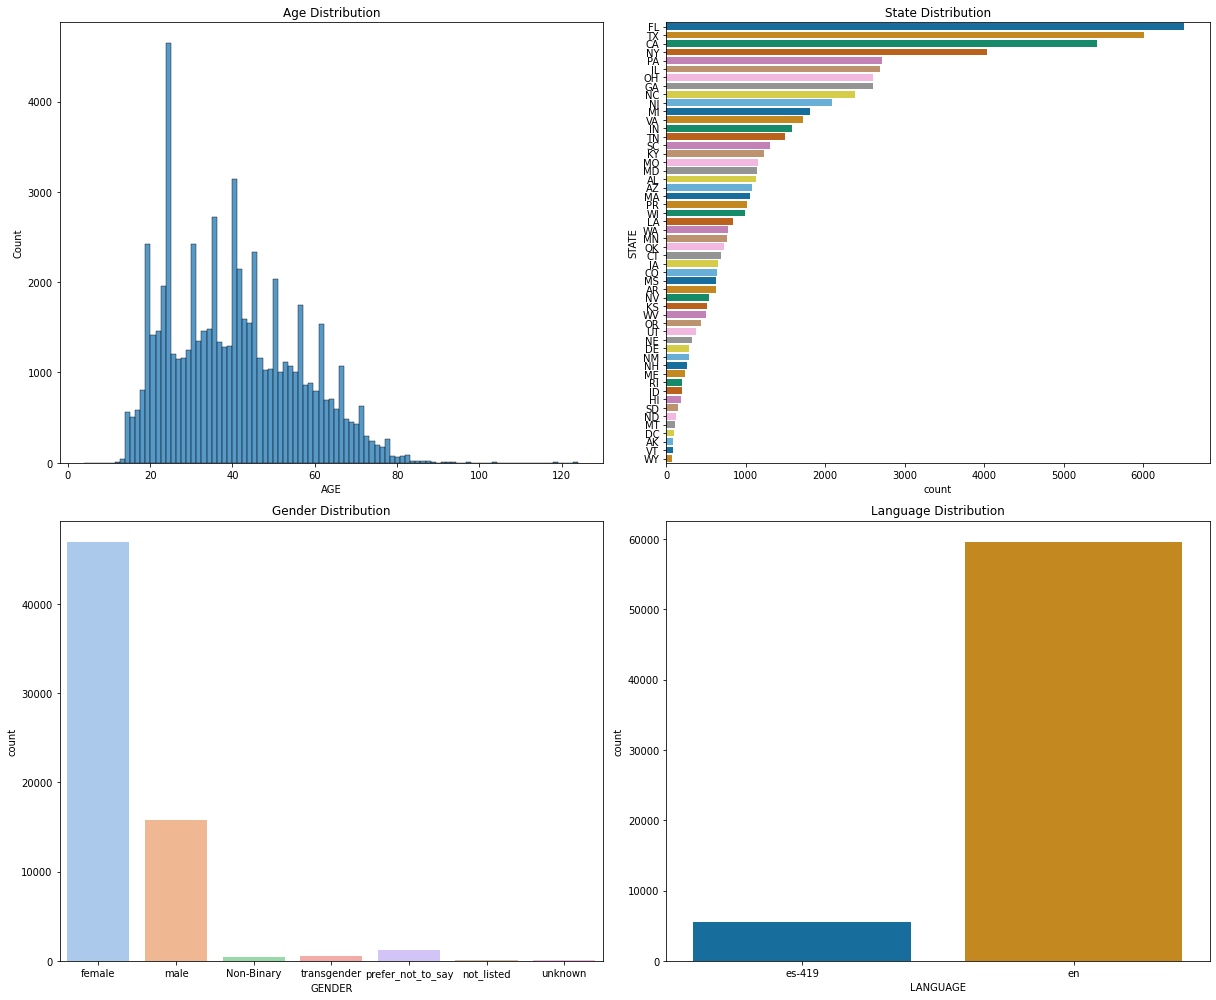

In [11]:


# Ensure AGE is numeric
user_data['AGE'] = pd.to_numeric(user_data['AGE'], errors='coerce')

# Drop missing values in categorical and age columns
user_data = user_data.dropna(subset=['AGE'])
user_data = user_data.dropna(subset=['STATE', 'GENDER', 'LANGUAGE'])

# Ensure no multi-dimensional data structure exists
user_data = user_data.reset_index(drop=True)

# Convert AGE to a numpy array if necessary
user_data['AGE'] = user_data['AGE'].to_numpy().flatten()

# Create subplots
fig, axes = plt.subplots(2,2, figsize=(17, 14))  # Adjust figure size as needed

# Distribution of Age
sns.histplot(data=user_data, x='AGE', ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

# Distribution of State
sns.countplot(y=user_data['STATE'], order=user_data['STATE'].value_counts().index, ax=axes[0, 1], palette = 'colorblind')
axes[0, 1].set_title('State Distribution')

# Distribution of Gender
sns.countplot(x=user_data['GENDER'], ax=axes[1, 0], palette = 'pastel')
axes[1, 0].set_title('Gender Distribution')

# Distribution of Language
sns.countplot(x=user_data['LANGUAGE'], ax=axes[1, 1], palette='colorblind')
axes[1, 1].set_title('Language Distribution')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()



In [12]:
# Save the modified user_data dataset
user_data.to_csv("user_data_cleaned.csv", index=False)

## 2.Transaction Dataset

In [13]:
#Exploring the first few rows
trans_data.head() 

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,


In [14]:
#dataset overview
trans_data.info(), trans_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      50000 non-null  object 
 1   PURCHASE_DATE   50000 non-null  object 
 2   SCAN_DATE       50000 non-null  object 
 3   STORE_NAME      50000 non-null  object 
 4   USER_ID         50000 non-null  object 
 5   BARCODE         44238 non-null  float64
 6   FINAL_QUANTITY  50000 non-null  object 
 7   FINAL_SALE      50000 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.1+ MB


(None, (50000, 8))

In [15]:
#checking missing values
trans_data.isnull().sum()

RECEIPT_ID           0
PURCHASE_DATE        0
SCAN_DATE            0
STORE_NAME           0
USER_ID              0
BARCODE           5762
FINAL_QUANTITY       0
FINAL_SALE           0
dtype: int64

In [16]:
#checking duplicates in Receipt_id column
duplicates = trans_data['RECEIPT_ID'].duplicated().sum()
print(f"Duplicate RECEIPT_IDs: {duplicates}")


Duplicate RECEIPT_IDs: 25560


In [17]:
# Investigate duplicates by inspecting the first few duplicate entries
duplicate_entries = trans_data[trans_data['RECEIPT_ID'].duplicated(keep=False)]
duplicate_entries.head()


,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,


In [18]:
# Filter rows where RECEIPT_ID matches the specified value
specific_receipt_rows = trans_data[trans_data['RECEIPT_ID'] == '0000d256-4041-4a3e-adc4-5623fb6e0c99']

# Display the filtered rows
specific_receipt_rows


,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
41567,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,1.54


In [19]:
# Filter rows where RECEIPT_ID matches the specified value
specific_receipt_rows = trans_data[trans_data['RECEIPT_ID'] == '000239aa-3478-453d-801e-66a82e39c8af']

# Display the filtered rows
specific_receipt_rows

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
41475,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,1.00,3.49


Observation: The number of duplicate IDs is quite high, therefore i crosschecked the first few duplicate entries to verify whether multiple products are tied to a same transaction(e.g., one receipt contains several items, and each item has a separate entry) but it's not the case. This is by far the highest data quality issues encountered and needs further investigation. 

In [20]:
# checking for scan dates earlier than purchase dataes

trans_data['PURCHASE_DATE'] = pd.to_datetime(trans_data['PURCHASE_DATE'], errors='coerce')
trans_data['SCAN_DATE'] = pd.to_datetime(trans_data['SCAN_DATE'], errors='coerce')
trans_data['PURCHASE_DATE'] = trans_data['PURCHASE_DATE'].dt.date
trans_data['SCAN_DATE'] = trans_data['SCAN_DATE'].dt.date
trans_data['SCAN_DATE'] = pd.to_datetime(trans_data['SCAN_DATE'], errors='coerce')
trans_data['PURCHASE_DATE'] = pd.to_datetime(trans_data['PURCHASE_DATE'], errors='coerce')



invalid_purchase_dates = trans_data['PURCHASE_DATE'].isnull().sum()
invalid_scan_dates = trans_data['SCAN_DATE'].isnull().sum()
print(f"Invalid PURCHASE_DATE entries: {invalid_purchase_dates}")
print(f"Invalid SCAN_DATE entries: {invalid_scan_dates}")

# Check for scan dates earlier than purchase dates
invalid_date_order = (trans_data['SCAN_DATE'] < trans_data['PURCHASE_DATE']).sum()
print(f"Transactions with SCAN_DATE earlier than PURCHASE_DATE: {invalid_date_order}")


Invalid PURCHASE_DATE entries: 0
Invalid SCAN_DATE entries: 0
Transactions with SCAN_DATE earlier than PURCHASE_DATE: 94


### Correlation heatmap between FINAL_QUANTITY & FINAL_SALE

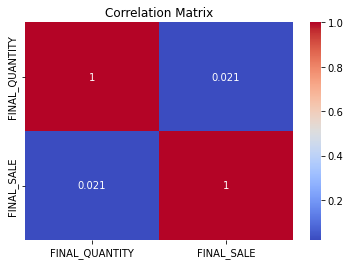

In [21]:

# Convert FINAL_QUANTITY and FINAL_SALE to numeric, replace 'zero' with 0, and coerce other errors to NaN
trans_data['FINAL_QUANTITY'] = pd.to_numeric(trans_data['FINAL_QUANTITY'].replace('zero', 0), errors='coerce')
trans_data['FINAL_SALE'] = pd.to_numeric(trans_data['FINAL_SALE'], errors='coerce')

# Now create the correlation heatmap
corr = trans_data[['FINAL_QUANTITY', 'FINAL_SALE']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### Quantity vs Final Sale

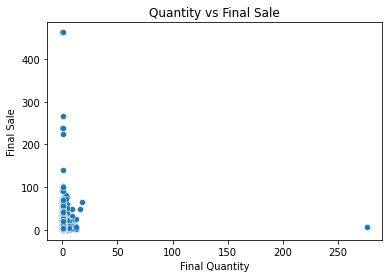

In [22]:
sns.scatterplot(x='FINAL_QUANTITY', y='FINAL_SALE', data=trans_data)
plt.title('Quantity vs Final Sale')
plt.xlabel('Final Quantity')
plt.ylabel('Final Sale')
plt.show()


### Top 10 Stores by Count

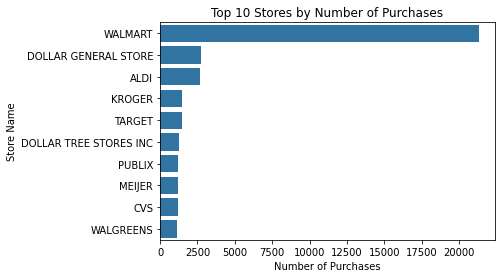

In [23]:
# Top 10 Stores by Count
top_stores = trans_data['STORE_NAME'].value_counts().head(10)
sns.barplot(x=top_stores.values, y=top_stores.index)
plt.title('Top 10 Stores by Number of Purchases')
plt.xlabel('Number of Purchases')
plt.ylabel('Store Name')


plt.show()


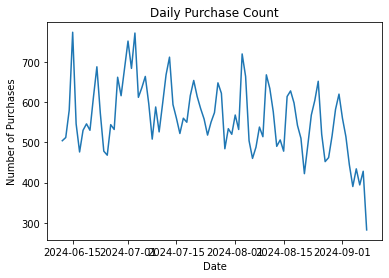

In [24]:
# Example: Daily purchase count over time
trans_data['PURCHASE_DATE'] = pd.to_datetime(trans_data['PURCHASE_DATE'])
daily_purchases = trans_data.groupby(trans_data['PURCHASE_DATE'].dt.date).size()
daily_purchases.plot(kind='line', title='Daily Purchase Count')
plt.xlabel('Date')
plt.ylabel('Number of Purchases')
plt.show()


In [25]:
#understanding possible value for categorical data columns
for feature in trans_data.columns:
    if trans_data[feature].dtype==object:
        print(feature,  trans_data[feature].unique())

RECEIPT_ID ['0000d256-4041-4a3e-adc4-5623fb6e0c99'
 '0001455d-7a92-4a7b-a1d2-c747af1c8fd3'
 '00017e0a-7851-42fb-bfab-0baa96e23586' ...
 'fffbb112-3cc5-47c2-b014-08db2f87e0c7'
 'fffbfb2a-7c1f-41c9-a5da-628fa7fcc746'
 'fffe8012-7dcf-4d84-b6c6-feaacab5074a']
STORE_NAME ['WALMART' 'ALDI' 'FOOD LION' 'RANDALLS' 'TARGET' 'COSTCO'
 'DOLLAR TREE STORES INC' 'FAMILY DOLLAR' 'KROGER' 'FOODS CO'
 'REAES STORE' 'IGA' 'DOLLAR GENERAL STORE' 'PUBLIX' "MACEY'S" 'WALGREENS'
 'CVS' 'WINCO FOODS' 'THE HOME DEPOT' 'FRED MEYER' 'MARKET BASKET'
 '7-ELEVEN' 'HOBBY LOBBY' 'GIANT EAGLE' 'HY-VEE' "SAM'S CLUB"
 'WHISPERING PINES FRUIT FARMS' 'JEWEL OSCO' 'SHELL' 'NELES GRANACOT'
 "TRADER JOE'S" 'FIVE BELOW' 'GROCERY OUTLET BARGAIN MARKET' 'SMART SHOP'
 'TINKEN AFB COMMIE' 'ALBERTSONS' 'LIDL' 'PHARMACY' 'WEIS' 'FASTRAC'
 'RITE AID' 'MEIJER' 'COMMISSARY' 'FOODLAND' 'PAL CAMPO RESTAURANT'
 "BJ'S WHOLESALE CLUB" 'CARRS' 'SHOP RITE' 'PLAVERS CAFE LIDA'
 'WINN-DIXIE' 'SAFEWAY' 'MI TIENDA' 'CIRCLE K' 'NUTS FACTORY 74T

Observation: 

1. The FINAL_QUANTITY column contains numeric values stored as strings (e.g., '1.00', '2.00') along with non-numeric values like 'zero'. All values in this column should be numeric, and "zero" should be standardized to 0.00

2. The FINAL_SALE column contains empty strings (' '), which likely represent missing values. These should either be converted to NaN or another appropriate missing value indicator to handle them properly during analysis.

3. The SCAN_DATE column contains specific timestamps down to milliseconds (e.g., '2024-08-21 14:19:06.539 Z'). Both PURCHASE_DATE and SCAN_DATE have to be stored in a standardized date format (e.g., YYYY-MM-DD).

4. There are 25,560 duplicate RECEIPT_IDs, which is a significant portion of the total records (out of 50,000 records). This require further investigation to understand the reason why there is such a high number of duplicate RECEIPT_IDs. 
Further investigations are necessary to understand whether this is an expected behavior in the app(resubmission of receipts), a data quality issue or an indicator of potential abuse. 

5. In PURCHASE_DATE and SCAN_DATE Columns, some rows(94) have the scan date occuring before the purchase date, which would indicate a data issue. 


In [26]:
#dropping rows where barcode is empty or null
trans_data = trans_data[trans_data['BARCODE'].notna() & (trans_data['BARCODE'] != '')]
# Save the file back with the updated format
trans_data.to_csv("trans_data_cleaned.csv", index=False)


## 3. Product Dataset

In [27]:
#reading the first 5 lines of product dataset
prod_data.head() 

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11


In [28]:
#data overview
prod_data.info(), prod_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845552 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CATEGORY_1    845441 non-null  object 
 1   CATEGORY_2    844128 non-null  object 
 2   CATEGORY_3    784986 non-null  object 
 3   CATEGORY_4    67459 non-null   object 
 4   MANUFACTURER  619078 non-null  object 
 5   BRAND         619080 non-null  object 
 6   BARCODE       841527 non-null  float64
dtypes: float64(1), object(6)
memory usage: 45.2+ MB


(None, (845552, 7))

In [29]:
#checking for missing values
prod_data.isnull().sum()

CATEGORY_1         111
CATEGORY_2        1424
CATEGORY_3       60566
CATEGORY_4      778093
MANUFACTURER    226474
BRAND           226472
BARCODE           4025
dtype: int64

In [30]:
#understanding possible value for categorical data columns
for feature in prod_data.columns:
    if prod_data[feature].dtype==object:
        print(feature,  prod_data[feature].unique())

CATEGORY_1 ['Health & Wellness' 'Snacks' 'Beverages' 'Pantry' 'Alcohol'
 'Apparel & Accessories' 'Restaurant' 'Needs Review' 'Dairy'
 'Home & Garden' nan 'Household Supplies' 'Meat & Seafood' 'Deli & Bakery'
 'Sporting Goods' 'Produce' 'Office & School' 'Frozen'
 'Arts & Entertainment' 'Animals & Pet Supplies' 'Electronics' 'Beauty'
 'Toys & Games' 'Mature' 'Vehicles & Parts' 'Baby & Toddler'
 'Luggage & Bags' 'Media']
CATEGORY_2 ['Sexual Health' 'Puffed Snacks' 'Hair Care' 'Oral Care'
 'Medicines & Treatments' 'Deodorant & Antiperspirant' 'Snack Bars' nan
 'Bath & Body' 'Nuts & Seeds' 'Candy' 'Cookies' 'Variety Snack Packs'
 'Hair Removal' 'Medical Supplies & Equipment' 'Chips' 'Snack Cakes'
 'Skin Care' 'Dessert Toppings' 'Eye Care' 'Fruit & Vegetable Snacks'
 'Snack Mixes' 'Crackers' 'Jerky & Dried Meat'
 'Topical Muscle & Joint Relief Treatments' 'Foot Care' 'First Aid'
 'Ear Care' 'Menstrual Care' 'Pretzels' 'Trail Mix' 'Dips & Salsa'
 'Adult Incontinence' 'Water' 'Cereal, Granola

MANUFACTURER [nan 'PLACEHOLDER MANUFACTURER' 'COLGATE-PALMOLIVE' ... 'VIDETTE INC'
 'SCRUB-IT' 'OUTDOOR PRODUCT INNOVATIONS, INC.']
BRAND [nan 'ELECSOP' 'COLGATE' ... 'SHULEMIN' 'RHINO BLINDS' 'GATEWAY']


In [31]:
#checking unique values in CATEGORY_1 and CATEGORY_2 columns
print(prod_data['CATEGORY_1'].unique())
print('------------------------------------------------------------------------------')
print(prod_data['CATEGORY_2'].unique())

['Health & Wellness' 'Snacks' 'Beverages' 'Pantry' 'Alcohol'
 'Apparel & Accessories' 'Restaurant' 'Needs Review' 'Dairy'
 'Home & Garden' nan 'Household Supplies' 'Meat & Seafood' 'Deli & Bakery'
 'Sporting Goods' 'Produce' 'Office & School' 'Frozen'
 'Arts & Entertainment' 'Animals & Pet Supplies' 'Electronics' 'Beauty'
 'Toys & Games' 'Mature' 'Vehicles & Parts' 'Baby & Toddler'
 'Luggage & Bags' 'Media']
------------------------------------------------------------------------------
['Sexual Health' 'Puffed Snacks' 'Hair Care' 'Oral Care'
 'Medicines & Treatments' 'Deodorant & Antiperspirant' 'Snack Bars' nan
 'Bath & Body' 'Nuts & Seeds' 'Candy' 'Cookies' 'Variety Snack Packs'
 'Hair Removal' 'Medical Supplies & Equipment' 'Chips' 'Snack Cakes'
 'Skin Care' 'Dessert Toppings' 'Eye Care' 'Fruit & Vegetable Snacks'
 'Snack Mixes' 'Crackers' 'Jerky & Dried Meat'
 'Topical Muscle & Joint Relief Treatments' 'Foot Care' 'First Aid'
 'Ear Care' 'Menstrual Care' 'Pretzels' 'Trail Mix' 'Dip

### Visualizing distribution of CATEGORY_1 

<Axes: xlabel='CATEGORY_1'>

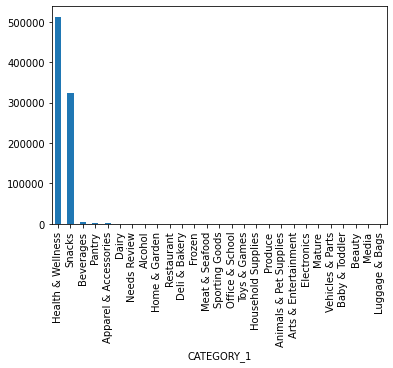

In [32]:
# Visualizing distribution of CATEGORY_1
prod_data['CATEGORY_1'].value_counts().plot(kind='bar')

### Bar Plot of Missing Values 

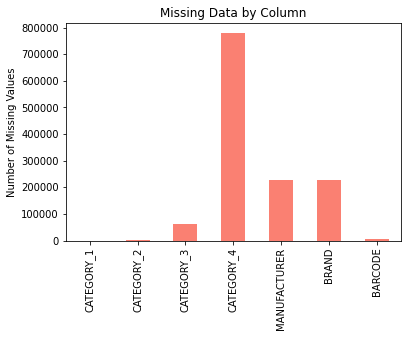

In [33]:
prod_data.isnull().sum().plot(kind='bar', color='salmon')
plt.title('Missing Data by Column')
plt.ylabel('Number of Missing Values')
plt.show()


Observation:
1. CATEGORY_1 Contains some missing values (nan), which is concerning because this is the top-level categorization of the product. CATEGORY_2 to CATEGORY_4 contain more missing values suggesting that the data becomes more incomplete as you do down the hierarchy.

2. MANUFACTURER and BRAND: These columns also have missing values (nan), which could hinder analyses involving specific brands or manufacturers. 

3. There is a significant imbalance in the distribution of categories or data points. It would be important to investigate why most of categories have very low counts of data entries.



In [34]:
#dropping rows where barcode is empty or null
prod_data = prod_data[prod_data['BARCODE'].notna() & (prod_data['BARCODE'] != '')]
# Save the modified prod_data dataset
prod_data.to_csv("prod_data_cleaned.csv", index=False)
